## ME 405 HW 0x04: Linearization and Simulation of the Balancing Platform Board
Authors: Ryan McLaughlin and Matthew Frost <br>
Originally Created: 04/25/21 <br>
Last Modified: 05/03/21 <br>
### Initial Setup and Variable Definitions

In [1]:
from sympy import *
init_printing()
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Create empty classes which are somewhat equivalent to MATLAB struct()
class functions:
    pass
class functions0:
    pass
class equations:
    pass
class equationNames:
    pass

Define fun, eqn, and eqnNames as the "structures." These will now allow for notation for fun.xB to save an equation xB within the ```functions``` class.

In [3]:
fun = functions()
fun0 = functions0()
eqn = equations()
eqnNames = equationNames()

Define symbolic variables (constants and functions of time)

In [4]:
r_C, t, r_B, r_G, m_B, m_P, I_bar_p_yy, M_y, g, T_x, L_p, r_M, I_B = symbols('r_C, t, r_B, r_G, m_B, m_P, \overline{I}_{pyy}, M_y, g, T_x, L_p, r_M I_B')     
x = Function('x')(t)
theta_y = Function('theta_y')(t)

Compute the moment of inertia of the ball, $\overline{I}_B$

In [5]:
I_B = I_B.subs([(Symbol('I_B'),.4*Symbol('m_B')*Symbol('r_B')**2)])

### 1) Ball Kinematics
X-Direction Kinematic Equations

In [6]:
fun.xB = (r_C + r_B)*sin(theta_y) + x*cos(theta_y) # x displacement of ball
# print('xB:')
# display(fun.xB)
fun.xBdot = diff(fun.xB,t)      # x velocity of ball
# print('xBdot:')
# display(fun.xBdot)
fun.xBddot = diff(fun.xBdot,t)  # x accceleration of ball
# print('xBddot:')
# display(fun.xBddot)

Z-Direction Kinematic Equations

In [7]:
fun.zB = (r_C + r_B)*cos(theta_y) - x*sin(theta_y) # z displacement of ball
# print('zB:')
# display(fun.zB)
fun.zBdot = diff(fun.zB,t)                        # z velocity of ball
# print('zBdot:')
# display(fun.zBdot)
fun.zBddot = diff(fun.zBdot,t)                    # z acceleration of ball
# print('zBddot:')
# display(fun.zBddot)

### 2) Motor Torque to Platform Moment

Define the effective moment on the platform, $ M_y $ in terms of the input motor torque, $ T_x $

In [8]:
## DEFINE My IN TERMS OF MOTOR TORQUE
M_y = -L_p*T_x/r_M
# display(M_y)

### 3) Equations of Motion
##### 3.1) System 1: Ball and Platform Together

In [9]:
fun0.lhs1 = m_P*g*r_G*sin(theta_y) + m_B*g*( (r_C+r_B)*sin(theta_y)+x*cos(theta_y) ) + M_y;
fun0.rhs1 = ((I_bar_p_yy + m_P*r_G**2)*diff(theta_y,t,2) 
              - m_B*fun.zBddot*( (r_C+r_B)*sin(theta_y)+x*cos(theta_y) )
              + m_B*fun.xBddot*( (r_C+r_B)*cos(theta_y)-x*sin(theta_y)) 
              + (I_B)*((diff(x,t,2)/r_B) + diff(theta_y,t,2)));
fun0.EOM1 = Eq(fun0.lhs1,fun0.rhs1)
fun.EOM1  = fun0.EOM1.subs([(diff(x,t,2),Symbol('\ddot{x}')),(diff(x,t),Symbol('\dot{x}')),
                             (diff(theta_y,t,2),Symbol('\ddot{\\theta}_y')),(diff(theta_y,t),Symbol('\dot{\\theta}_y')),
                             (x,Symbol('x')),(theta_y,Symbol('\\theta_y'))])
# print('EOM1')
# display(fun.EOM1);

#### 3.2) System 2: Ball Only

In [10]:
fun0.lhs2 = m_B*g*r_B*sin(theta_y);
fun0.rhs2 = (-m_B*fun.zBddot*r_B*sin(theta_y)
            + m_B*fun.xBddot*r_B*cos(theta_y) 
            + (I_B)*((diff(x,t,2)/r_B) + diff(theta_y,t,2)));
fun0.EOM2 = Eq(fun0.lhs2,fun0.rhs2)
fun.EOM2 = fun0.EOM2.subs([(diff(x,t,2),Symbol('\ddot{x}')),(diff(x,t),Symbol('\dot{x}')),
                             (diff(theta_y,t,2),Symbol('\ddot{\\theta}_y')),(diff(theta_y,t),Symbol('\dot{\\theta}_y')),
                             (x,Symbol('x')),(theta_y,Symbol('\\theta_y'))])
# print('EOM2')
# display(fun.EOM2)

### 4) Convert EOM's to Matrix Form
Next, the ```linear_eq_to_matrix``` function (similar to ```equationsToMatrix``` in MATLAB®) is used.

In [11]:
# eqnsForMatrix = Matrix([[fun.EOM1],[fun.EOM2]])
# varsForMatrix = Matrix([[diff(theta_y,t,2)],[diff(x,t,2)]])
M, f = linear_eq_to_matrix([fun.EOM1, fun.EOM2], [Symbol('\ddot{x}'), Symbol('\ddot{\\theta}_y')])
print('The M matrix is:')
display(simplify(M))
print('The f matrix is:')
display(simplify(f))

The M matrix is:


⎡                                                               2             
⎢-m_B⋅(1.4⋅r_B + 1.0⋅r_C)  -1.0⋅\overline{I}_{pyy} - 1.4⋅m_B⋅r_B  - 2.0⋅m_B⋅r_
⎢                                                                             
⎣      -1.4⋅m_B⋅r_B                                           -m_B⋅r_B⋅(1.4⋅r_

                   2            2              2⎤
B⋅r_C - 1.0⋅m_B⋅r_C  - 1.0⋅m_B⋅x  - 1.0⋅m_P⋅r_G ⎥
                                                ⎥
B + 1.0⋅r_C)                                    ⎦

The f matrix is:


⎡Lₚ⋅Tₓ                                                                        
⎢───── + 2⋅\dot{\theta}_y⋅\dot{x}⋅m_B⋅x - g⋅m_B⋅r_B⋅sin(\theta_y) - g⋅m_B⋅r_C⋅
⎢ r_M                                                                         
⎢                                                                             
⎢                                                        ⎛              2     
⎣                                               -m_B⋅r_B⋅⎝\dot{\theta}_y ⋅x + 

                                                               ⎤
sin(\theta_y) - g⋅m_B⋅x⋅cos(\theta_y) - g⋅m_P⋅r_G⋅sin(\theta_y)⎥
                                                               ⎥
                                                               ⎥
               ⎞                                               ⎥
g⋅sin(\theta_y)⎠                                               ⎦

Convert matrices to form of $x=M^{-1}f$

In [12]:
G = simplify(M.inv()*f)
# print('xDotMatrix')
# display(xDotMatrix)
h = Matrix([[Symbol('\dot{x}')], [Symbol('\dot{\\theta}_y')],[G[0]],[G[1]]])
# display(G)

Create $h$ matrix for state space representation

In [13]:
# CREATE h MATRIX FOR STATE SPACE
h = Matrix([[Symbol('\dot{x}')], [Symbol('\dot{\\theta}_y')],[G[0]],[G[1]]])
# print('h')
# display(h)

### 5) Jacobian Linearization
Define the state variable matrix

In [14]:
x_vec_variables = Matrix([[Symbol('x')],[Symbol('\\theta_y')],[Symbol('\dot{x}')],[Symbol('\dot{\\theta}_y')]])

Compute the Jacobian with respect to the state vector, and define operating point by subsituting zeros for all state variables present

In [15]:
Jx = h.jacobian(x_vec_variables)
Jx_subbed = Jx.subs([(Symbol('x'),0),(Symbol('\\theta_y'),0),(Symbol('\dot{x}'),0),(Symbol('\dot{\\theta}_y'),0)])
# display(Jx_subbed)

Substitue values for all other constants to determine a numerical form of the $A$ matrix

In [16]:
A = Jx_subbed.subs([(r_M,0.06),(r_B,0.0105),(r_G, 0.042),(L_p, 0.110),(r_C, 0.050),(m_B, 0.030),(m_P, 0.400),(I_bar_p_yy, 1.88e-3),(g,9.81),(Symbol('x'),0),(Symbol('\\theta_y'),0),(Symbol('\dot{x}'),0),(Symbol('\dot{\\theta}_y'),0),(Symbol('T_x'),0)])
print('A Matrix:')
display(A)

A Matrix:


⎡        0                 0          1  0⎤
⎢                                         ⎥
⎢        0                 0          0  1⎥
⎢                                         ⎥
⎢-5.21699855336125  4.01109511649826  0  0⎥
⎢                                         ⎥
⎣112.887140258203   64.8294719768538  0  0⎦

Compute the Jacobian with respect to the input vector, define operating point, and substitute numerical values to determine $B$ matrix

In [17]:
Ju = h.jacobian([Symbol('T_x')])
Ju_subbed = Ju.subs([(Symbol('x'),0),(Symbol('\\theta_y'),0),(Symbol('\dot{x}'),0),(Symbol('\dot{\\theta}_y'),0),(Symbol('T_x'),0)])
# display(Ju_subbed)

In [18]:
B = Ju_subbed.subs([(r_M,0.06),(r_B,0.0105),(r_G, 0.042),(L_p, 0.110),(r_C, 0.050),(m_B, 0.030),(m_P, 0.400),(I_bar_p_yy, 1.88e-3),(g,9.81),(Symbol('x'),0),(Symbol('\\theta_y'),0),(Symbol('\dot{x}'),0),(Symbol('\dot{\\theta}_y'),0),(Symbol('T_x'),0)])
print('B Matrix')
display(B)

B Matrix


⎡        0        ⎤
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎢32.4991415148792 ⎥
⎢                 ⎥
⎣-703.227173428607⎦

### 6) Simulation of State Space Model
After linearizing the system, we are now ready to use the ```scipy``` Python library to simulate the time response of the balancing platform system in both open- and closed-loop configurations

In [19]:
from scipy.signal import lti, lsim
from numpy import array, eye, linspace, ones, round, zeros_like, multiply
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '9'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'times'

Convert earlier defined $A$ and $B$ matrices to ```numpy``` arrays

In [20]:
AA = array([[A[0,0], A[0,1], A[0,2], A[0,3]], [A[1,0], A[1,1], A[1,2], A[1,3]], [A[2,0], A[2,1], A[2,2], A[2,3]], [A[3,0], A[3,1], A[3,2], A[3,3]]])
BB = array([[B[0,0]], [B[1,0]], [B[2,0]], [B[3,0]]])
CC = array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
DD = array([[0], [0], [0], [0]])
# display(AA)
# display(BB)
# display(CC)
# display(DD)

Define a linear, time-invariant state space system based on the $A$, $B$, $C$, and $D$ matrices defined above using the ```scipy.lti```

In [21]:
ltiSystem = lti(AA, BB, CC, DD)

#### 6.1) Open Loop Simulation 1
Initial conditions: Ball is at rest on a level platform, located in the center of the platfrom, and no input is applied

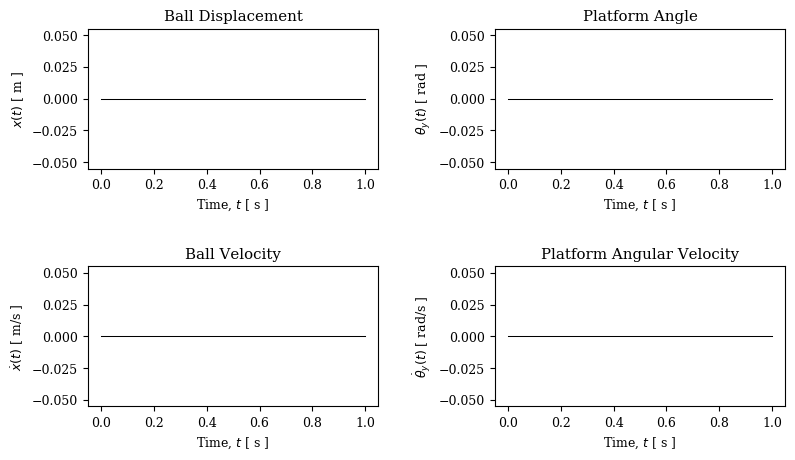

In [22]:
t1 = linspace(0, 1, num=50)
u1 = zeros_like(t)
x01 = array([[0, 0, 0, 0]])

tout1, y1, x1 = lsim(ltiSystem, U = u1, T = t1, X0 = x01)

fig1,axs1 = plt.subplots(2,2,figsize = (9,5), dpi = 100, constrained_layout=True)
plt.subplots_adjust(hspace = 0.7,wspace = 0.4)

axs1[0,0].plot(t1, y1[:,0],'k',linewidth = 0.75)
axs1[0,0].set(title='Ball Displacement',xlabel = r'Time, $t$ [ s ]',ylabel = r'$x(t)$ [ m ]')
axs1[0,1].plot(t1, y1[:,1],'k',linewidth = 0.75)
axs1[0,1].set(title='Platform Angle',xlabel = r'Time, $t$ [ s ]',ylabel = r'${\theta}_y(t)$ [ rad ]')
axs1[1,0].plot(t1, y1[:,2],'k',linewidth = 0.75)
axs1[1,0].set(title='Ball Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{x}(t)$ [ m/s ]')
axs1[1,1].plot(t1, y1[:,3],'k',linewidth = 0.75)
axs1[1,1].set(title='Platform Angular Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{\theta}_y(t)$ [ rad/s ]')

plt.show()
fig1.savefig('405_HW0x04_OpenLoop1.png')

## 6.2) Open Loop Simulation 2
Initial conditions: Ball is at rest on a level platform, offset 5 cm horizontally from the center of the platform, and no input is applied

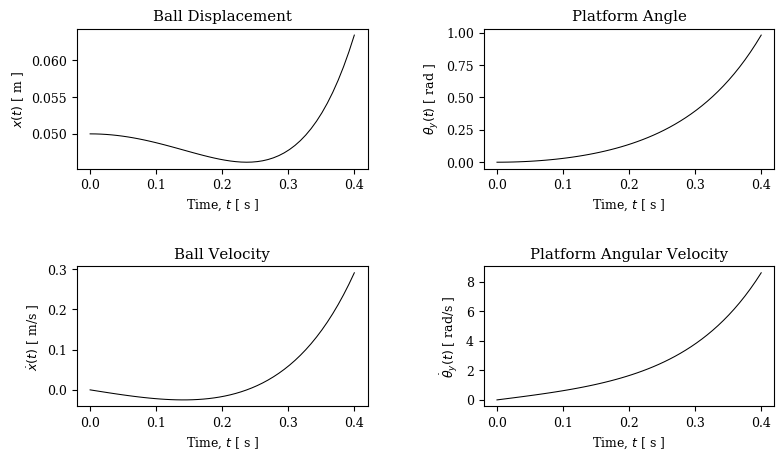

In [23]:
t2 = linspace(0, 0.4, num=50)
u2 = zeros_like(t)
x02 = array([[0.05, 0, 0, 0]])

tout2, y2, x2 = lsim(ltiSystem, U = u2, T = t2, X0 = x02)

fig2,axs2 = plt.subplots(2,2,figsize = (9,5), dpi = 100, constrained_layout=True)
plt.subplots_adjust(hspace = 0.7,wspace = 0.4)

axs2[0,0].plot(t2, y2[:,0],'k',linewidth = 0.75)
axs2[0,0].set(title='Ball Displacement',xlabel = r'Time, $t$ [ s ]',ylabel = r'$x(t)$ [ m ]')
axs2[0,1].plot(t2, y2[:,1],'k',linewidth = 0.75)
axs2[0,1].set(title='Platform Angle',xlabel = r'Time, $t$ [ s ]',ylabel = r'${\theta}_y(t)$ [ rad ]')
axs2[1,0].plot(t2, y2[:,2],'k',linewidth = 0.75)
axs2[1,0].set(title='Ball Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{x}(t)$ [ m/s ]')
axs2[1,1].plot(t2, y2[:,3],'k',linewidth = 0.75)
axs2[1,1].set(title='Platform Angular Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{\theta}_y(t)$ [ rad/s ]')

plt.show()
fig2.savefig('405_HW0x04_OpenLoop2.png')

### 6.3) Closed Loop Simulation
Initial conditions and controller: Ball is at rest on a level platform, offset 5 cm horizontally from the center of the platform, and closed-loop feedback is utilized <br> <br> Define the controller gain matrix, and find the new $A$, $B$, $C$, and $D$ matrices 

In [24]:
K = array([[-0.3, -0.2, -0.05, -0.02]])
A_CL = AA-BB*K
B_CL = array([[0], [0], [0], [0]])
C_CL = CC-DD*K
D_CL = array([[0], [0], [0], [0]]) 

New state space system definition

In [25]:
ltiSystemClosed = lti(A_CL, B_CL, C_CL, D_CL)

Plot the system response

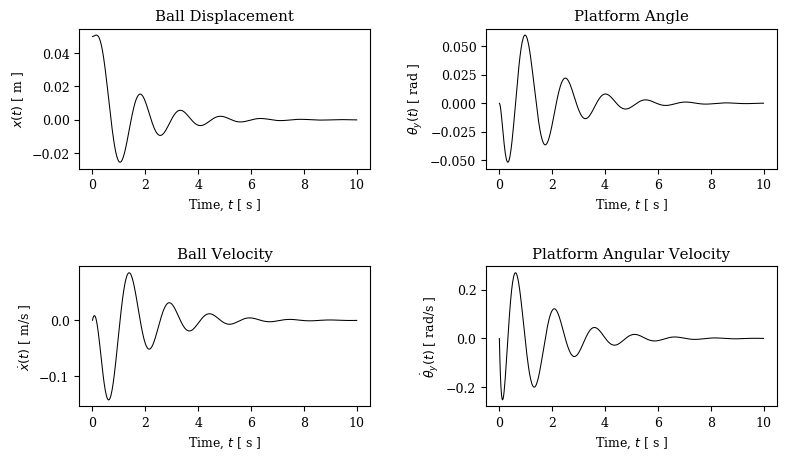

In [26]:
t3 = linspace(0, 10, num=500)

tout3, y3, x3 = lsim(ltiSystemClosed, U = u2, T = t3, X0 = x02)

fig3,axs3 = plt.subplots(2,2,figsize = (9,5), dpi = 100, constrained_layout=True)
plt.subplots_adjust(hspace = 0.7,wspace = 0.4)

axs3[0,0].plot(t3, y3[:,0],'k',linewidth = 0.75)
axs3[0,0].set(title='Ball Displacement',xlabel = r'Time, $t$ [ s ]',ylabel = r'$x(t)$ [ m ]')
axs3[0,1].plot(t3, y3[:,1],'k',linewidth = 0.75)
axs3[0,1].set(title='Platform Angle',xlabel = r'Time, $t$ [ s ]',ylabel = r'${\theta}_y(t)$ [ rad ]')
axs3[1,0].plot(t3, y3[:,2],'k',linewidth = 0.75)
axs3[1,0].set(title='Ball Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{x}(t)$ [ m/s ]')
axs3[1,1].plot(t3, y3[:,3],'k',linewidth = 0.75)
axs3[1,1].set(title='Platform Angular Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{\theta}_y(t)$ [ rad/s ]')

plt.show()
fig3.savefig('405_HW0x04_ClosedLoop.png')

In [27]:
# Define K matrix
K1, K2, K3, K4, s = symbols('K1, K2, K3, K4, s')
K = Matrix([[K1, K2, K3, K4]])

# Define closed-loop gain matrix
Acl = simplify(A-B*K)
display(Acl)

# Find characteristic polynomial
detMatrix = s*eye(4) - Acl
P_s = simplify(detMatrix.det())

# Find the coefficients of the polynomial
a = Poly(P_s, s)
a3 = a.coeffs()[1]
a2 = a.coeffs()[2]
a1 = a.coeffs()[3]
a0 = a.coeffs()[4]

⎡                   0                                       0                 
⎢                                                                             
⎢                   0                                       0                 
⎢                                                                             
⎢-32.4991415148792⋅K₁ - 5.21699855336125  4.01109511649826 - 32.4991415148792⋅
⎢                                                                             
⎣703.227173428607⋅K₁ + 112.887140258203   703.227173428607⋅K₂ + 64.82947197685

             1                     0          ⎤
                                              ⎥
             0                     1          ⎥
                                              ⎥
K₂  -32.4991415148792⋅K₃  -32.4991415148792⋅K₄⎥
                                              ⎥
38  703.227173428607⋅K₃   703.227173428607⋅K₄ ⎦

In [28]:
## Find the natural frequency and %OS that is desired
from math import sqrt, pi, log
Ts, wn, zeta, OS = symbols(u'T_s, omega_n, zeta, OS')
Ts = 2
OS = .2
zeta = -log(OS)/sqrt(pi**2 + (log(OS))**2)
wn = 4/(Ts*zeta)

In [29]:
## Find desired polynomial and coefficients from chosen poles
from numpy import roots, real
pole_1_2_coeff = [1, 2*zeta*wn, wn**2]
pole_1 = roots(pole_1_2_coeff)[0]
pole_2 = roots(pole_1_2_coeff)[1]

# Choose poles that are over 8x and 10x the real portion of poles 1 and 2
pole_3 = 8*real(pole_1)
pole_4 = 10*real(pole_1)

# Find actual characteristic polynomial
P_act = expand((s-pole_1)*(s-pole_2)*(s-pole_3)*(s-pole_4))
P_act_poly = Poly(P_act, s)

# Find the coefficients of the desired characteristic polynomial
P_act_coeff_3 = P_act_poly.coeffs()[1]
P_act_coeff_2 = P_act_poly.coeffs()[2]
P_act_coeff_1 = P_act_poly.coeffs()[3]
P_act_coeff_0 = P_act_poly.coeffs()[4]

In [30]:
## Find K1, K2, K3, and K4
eqn3 = Eq(a3,P_act_coeff_3)
eqn2 = Eq(a2,P_act_coeff_2)
eqn1 = Eq(a1,P_act_coeff_1)
eqn0 = Eq(a0,P_act_coeff_0)

[M,N] = linear_eq_to_matrix([eqn0, eqn1, eqn2, eqn3], [K1, K2, K3, K4])
K = linsolve((M,N))

# Take K values out of a "FiniteSet" and into a list to allow for indexing
K_parsed = (K.args[0])

In [40]:
## Verify that calculations are correct. The eigenvalues of the A-B*K matrix should
## bring back the poles of -2 + ~3.9j, -2 - ~3.9j, -16, -20
A_CL = Acl.subs([(K1,K_parsed[0]),(K2,K_parsed[1]),(K3,K_parsed[2]),(K4,K_parsed[3])])
# display(A_CL)
eigenvalues = list(A_CL.eigenvals().keys())
eig1 = eigenvalues[0]
eig2 = eigenvalues[1]
eig3 = eigenvalues[2]
eig4 = eigenvalues[3]
display(eig1.evalf())
display(eig2.evalf())
display(eig3.evalf())
display(eig4.evalf())

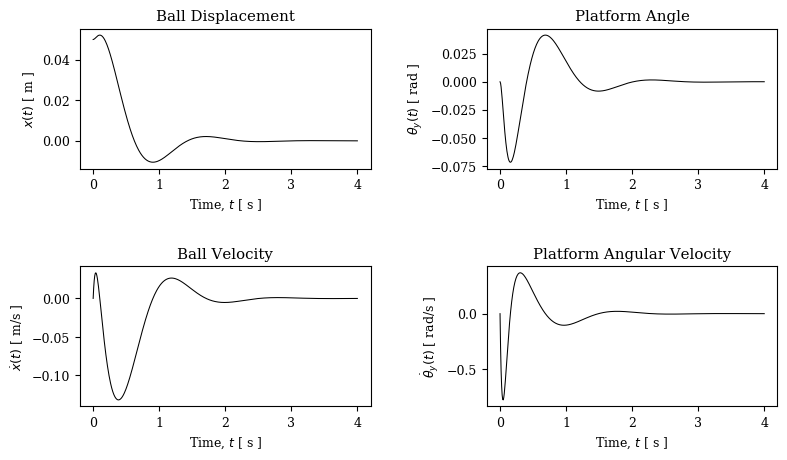

In [32]:
A_CL = Acl.subs([(K1,K_parsed[0]),(K2,K_parsed[1]),(K3,K_parsed[2]),(K4,K_parsed[3])])
B_CL = array([[0], [0], [0], [0]])
C_CL = CC-DD*K_parsed
D_CL = array([[0], [0], [0], [0]]) 

ltiSystemClosed_HW0x05 = lti(A_CL, B_CL, C_CL, D_CL)

t4 = linspace(0, 4, num=500)
u2 = zeros_like(t)
x02 = array([[0.05, 0, 0, 0]])

tout4, y4, x4 = lsim(ltiSystemClosed_HW0x05, U = u2, T = t4, X0 = x02)

fig4,axs4 = plt.subplots(2,2,figsize = (9,5), dpi = 100, constrained_layout=True)
plt.subplots_adjust(hspace = 0.7,wspace = 0.4)

axs4[0,0].plot(t4, y4[:,0],'k',linewidth = 0.75)
axs4[0,0].set(title='Ball Displacement',xlabel = r'Time, $t$ [ s ]',ylabel = r'$x(t)$ [ m ]')
axs4[0,1].plot(t4, y4[:,1],'k',linewidth = 0.75)
axs4[0,1].set(title='Platform Angle',xlabel = r'Time, $t$ [ s ]',ylabel = r'${\theta}_y(t)$ [ rad ]')
axs4[1,0].plot(t4, y4[:,2],'k',linewidth = 0.75)
axs4[1,0].set(title='Ball Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{x}(t)$ [ m/s ]')
axs4[1,1].plot(t4, y4[:,3],'k',linewidth = 0.75)
axs4[1,1].set(title='Platform Angular Velocity',xlabel = r'Time, $t$ [ s ]',ylabel = r'$\dot{\theta}_y(t)$ [ rad/s ]')

plt.show()
fig4.savefig('405_HW0x05_ClosedLoop.png')